In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [57]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin')


In [58]:
df.shape


(5572, 5)

In [59]:
df.describe()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [60]:
df[df['Unnamed: 2'].notnull()].loc[444]

for i in df[df['Unnamed: 2'].notnull()].loc[95]:
    print(i)

spam
Your free ringtone is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML
 PO Box 5249
 MK17 92H. 450Ppw 16"
nan


In [61]:
df['v2'].dropna().shape


(5572,)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [63]:
df[df['Unnamed: 2'].notnull()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [64]:
for i in pd.concat([df['v2'],df['Unnamed: 2']], axis=1, keys=['Con']).loc[22]:
    print(i)

So Ì_ pay first lar... Then when is da stock comin...


In [65]:
df['v2']=pd.concat([df['v2'],df['Unnamed: 2'],df['Unnamed: 3'],df['Unnamed: 4']],axis=1, keys = ['V2'])



In [66]:
df['v2'].isnull().sum()

0

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [68]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [69]:
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [70]:
(df['v1']=='ham').sum()

4825

In [71]:
(df['v1']=='spam').sum()

747

In [72]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [73]:
df = df.drop_duplicates()

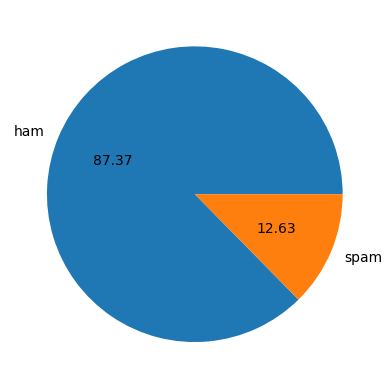

In [74]:
import matplotlib.pyplot as plt
plt.pie(df['v1'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [75]:
import nltk

In [76]:
df['character']=df['v2'].apply(len)



/tmp/ipykernel_42/3361399097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['character']=df['v2'].apply(len)


In [77]:
df

,v1,v2,character
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [78]:
df['v2'][5568]
nltk.word_tokenize(df['v2'][5569])

['Pity',
 ',',
 '*',
 'was',
 'in',
 'mood',
 'for',
 'that',
 '.',
 'So',
 '...',
 'any',
 'other',
 'suggestions',
 '?']

In [79]:
len(df['v2'][5569].split(' '))

10

In [80]:
df['words']=df['v2'].apply(lambda x: len(nltk.word_tokenize(x)))

df

/tmp/ipykernel_42/1354542260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words']=df['v2'].apply(lambda x: len(nltk.word_tokenize(x)))


,v1,v2,character,words
0,ham,"Go until jurong point, crazy.. Available only ...",111,23
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35
5568,ham,Will Ì_ b going to esplanade fr home?,37,9
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15
5570,ham,The guy did some bitching but I acted like i'd...,125,27


In [81]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


In [82]:
df['v1']= labelencoder.fit_transform(df['v1'])

/tmp/ipykernel_42/3548302762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v1']= labelencoder.fit_transform(df['v1'])


In [83]:
df

,v1,v2,character,words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [84]:
def lower(d):
    d=d.lower()
    return d

In [85]:
df['v2']=df['v2'].apply(lambda x: lower(x))
df

/tmp/ipykernel_42/1873108396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v2']=df['v2'].apply(lambda x: lower(x))


,v1,v2,character,words
0,0,"go until jurong point, crazy.. available only ...",111,23
1,0,ok lar... joking wif u oni...,29,8
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37
3,0,u dun say so early hor... u c already then say...,49,13
4,0,"nah i don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,35
5568,0,will ì_ b going to esplanade fr home?,37,9
5569,0,"pity, * was in mood for that. so...any other s...",57,15
5570,0,the guy did some bitching but i acted like i'd...,125,27


In [86]:
def word_token(z):
    z = nltk.word_tokenize(z)
    return z

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   v1         5169 non-null   int64 
 1   v2         5169 non-null   object
 2   character  5169 non-null   int64 
 3   words      5169 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 331.0+ KB


In [88]:
df['v2']= df['v2'].apply(lambda x : word_token(x))
df

/tmp/ipykernel_42/1334733666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v2']= df['v2'].apply(lambda x : word_token(x))


,v1,v2,character,words
0,0,"[go, until, jurong, point, ,, crazy.., availab...",111,23
1,0,"[ok, lar, ..., joking, wif, u, oni, ...]",29,8
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f...",155,37
3,0,"[u, dun, say, so, early, hor, ..., u, c, alrea...",49,13
4,0,"[nah, i, do, n't, think, he, goes, to, usf, ,,...",61,15
...,...,...,...,...
5567,1,"[this, is, the, 2nd, time, we, have, tried, 2,...",161,35
5568,0,"[will, ì_, b, going, to, esplanade, fr, home, ?]",37,9
5569,0,"[pity, ,, *, was, in, mood, for, that, ., so, ...",57,15
5570,0,"[the, guy, did, some, bitching, but, i, acted,...",125,27


In [89]:
def alphanumeric(a):
    y=[]
    for i in a:
        if i.isalnum():
            y.append(i)
            
    return y

In [90]:
df['v2']=df['v2'].apply(lambda x: alphanumeric(x))
df

/tmp/ipykernel_42/2371490025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v2']=df['v2'].apply(lambda x: alphanumeric(x))


,v1,v2,character,words
0,0,"[go, until, jurong, point, available, only, in...",111,23
1,0,"[ok, lar, joking, wif, u, oni]",29,8
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f...",155,37
3,0,"[u, dun, say, so, early, hor, u, c, already, t...",49,13
4,0,"[nah, i, do, think, he, goes, to, usf, he, liv...",61,15
...,...,...,...,...
5567,1,"[this, is, the, 2nd, time, we, have, tried, 2,...",161,35
5568,0,"[will, b, going, to, esplanade, fr, home]",37,9
5569,0,"[pity, was, in, mood, for, that, so, any, othe...",57,15
5570,0,"[the, guy, did, some, bitching, but, i, acted,...",125,27


In [91]:
s="I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

SyntaxError: expected ':' (3392888956.py, line 2)

In [ ]:
nltk.download('punkt')


NameError: name 'stopwords' is not defined

In [95]:
from nltk.corpus import stopwords
from string import punctuation

In [96]:
st=stopwords.words('english') 
st

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [99]:
df['v2'].apply(lambda x: string.punctuation(x))

NameError: name 'string' is not defined

In [ ]:
import string

In [97]:
def rem_stopwords(d):
    y=[]
    for i in d:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

In [98]:
df['v2']= df['v2'].apply(lambda x: rem_stopwords(x))
df

NameError: name 'string' is not defined

In [100]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [101]:
def stemming(s):
    y=[]
    for i in s:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [102]:
df['v2'] = df['v2'].apply(lambda x : stemming(x))
df

/tmp/ipykernel_42/1209373481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v2'] = df['v2'].apply(lambda x : stemming(x))


,v1,v2,character,words
0,0,go until jurong point avail onli in bugi n gre...,111,23
1,0,ok lar joke wif u oni,29,8
2,1,free entri in 2 a wkli comp to win fa cup fina...,155,37
3,0,u dun say so earli hor u c alreadi then say,49,13
4,0,nah i do think he goe to usf he live around he...,61,15
...,...,...,...,...
5567,1,thi is the 2nd time we have tri 2 contact u ha...,161,35
5568,0,will b go to esplanad fr home,37,9
5569,0,piti wa in mood for that so ani other suggest,57,15
5570,0,the guy did some bitch but i act like i be int...,125,27


In [103]:
len(df[df['v1']==1]['v2'].str.cat(sep=" "))

73482

In [104]:
from wordcloud import WordCloud
ws = WordCloud()

In [ ]:
pip install wordcloud

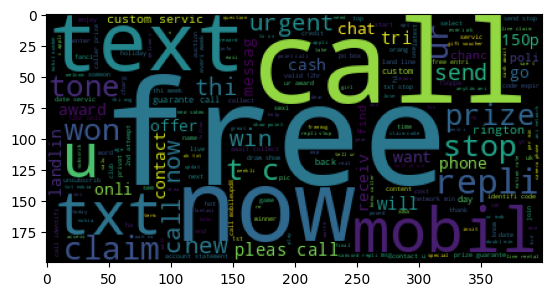

In [105]:
wc_spam = ws.generate(df[df['v1']==1]['v2'].str.cat(sep=" "))
plt.imshow(wc_spam)

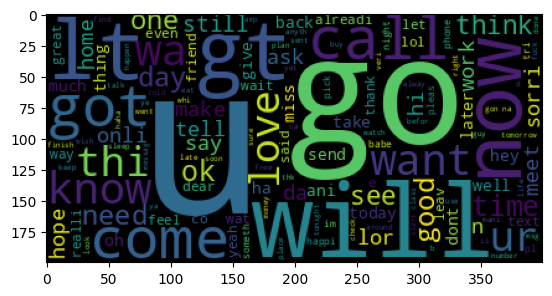

In [107]:
wc_ham = ws.generate(df[df['v1']==0]['v2'].str.cat(sep=" "))
plt.imshow(wc_ham)

In [106]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [110]:
x1=tfidf.fit_transform(df['v2']).toarray()

In [111]:
x=cv.fit_transform(df['v2']).toarray().shape

In [115]:
y = df['v1'].values

In [134]:
y_test.sum()

217

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(x1,y, test_size=0.3, random_state=3)

In [124]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [119]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [138]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.869116698903933
[[1171  163]
 [  40  177]]
0.5205882352941177


In [125]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9645390070921985
[[1334    0]
 [  55  162]]
1.0


In [126]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9780786589297228
[[1331    3]
 [  31  186]]
0.9841269841269841


In [132]:
df[df['v1']==0].shape

(4516, 4)

In [135]:
sum(y_test)

217

In [136]:
y_train.shape

(3618,)

In [137]:
y_test.shape

(1551,)